# Data Exploration
## Dataset

In [2]:
import pandas as pd

df = pd.read_csv('../data/labels_int.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head(8)

,Unnamed: 0,seal_id,rec_name,rhonchus_l,rhonchus_r,whistling_l,whistling_r
0,49,PV19084,PV19084_070219,1,0,1,0
1,15,PV18261,PV18261_231218,0,0,1,1
2,47,PV19081,PV19081_050219,1,1,0,0
3,4,PV18244,PV18244_141218,1,1,0,1
4,24,PV19001,PV19001_010119,1,1,0,1
5,29,PV19009,PV19009_040119,1,0,1,1
6,56,PV19113,PV19113_280219,1,1,0,0
7,45,PV19078,PV19078_040219,0,0,0,1


## Distribution

1    31
0    24
3     9
2     8
Name: rhonchus_l, dtype: int64
0    42
1    30
Name: whistling_l, dtype: int64


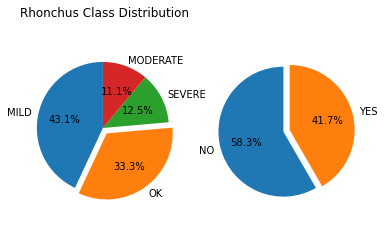

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
r_explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
w_explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

rhonchus_labels = ['MILD', 'OK', 'SEVERE', 'MODERATE']
whistling_labels = ['NO', 'YES']

fig, ax = plt.subplots(1, 2)

ax[0].pie(df.rhonchus_l.value_counts(), explode=r_explode, labels=rhonchus_labels, autopct='%1.1f%%',
          shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Rhonchus Class Distribution")

ax[1].pie(df.whistling_l.value_counts(), explode=w_explode, labels=whistling_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax[1].axis('equal')

print(df.rhonchus_l.value_counts())
print(df.whistling_l.value_counts())


# Methodology
## Data Augmentation

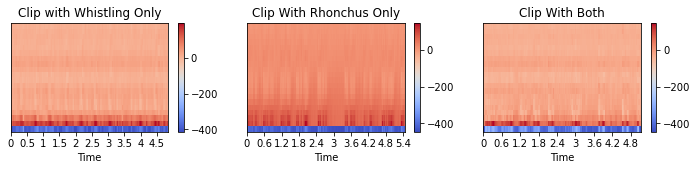

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

y, sr = librosa.load('../src/data/recordings/PV19058/PV19058_230119_L.wav', sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
y2, sr2 = librosa.load('../src/data/recordings/PV21027/PV21027_110221_R.wav', sr=None)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=20)
y3, sr3 = librosa.load('../src/data/recordings/PV21017/PV21017_L.wav', sr=None)
mfccs3 = librosa.feature.mfcc(y=y3, sr=sr3, n_mfcc=20)

fig, axs = plt.subplots(1, 3, figsize=(12, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=axs[0])
img2 = librosa.display.specshow(mfccs2, x_axis='time', ax=axs[1])
img3 = librosa.display.specshow(mfccs3, x_axis='time', ax=axs[2])

fig.colorbar(img, ax=[axs[0]])
fig.colorbar(img2, ax=[axs[1]])
fig.colorbar(img2, ax=[axs[2]])

axs[0].set(title='Clip with Whistling Only')
axs[1].set(title='Clip With Rhonchus Only')
axs[2].set(title='Clip With Both')
plt.savefig('mfcc_exampples.png')
plt.show()